## Read and Clean Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib.pyplot import rcParams

from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv("train.csv")
df_t = pd.read_csv("test.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.shape

(103904, 25)

In [6]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      103594 no

In [11]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,51950.102274,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,29997.914016,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25960.250000,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51955.500000,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77924.750000,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'id'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Flight Distance'}>],
       [<Axes: title={'center': 'Inflight wifi service'}>,
        <Axes: title={'center': 'Departure/Arrival time convenient'}>,
        <Axes: title={'center': 'Ease of Online booking'}>,
        <Axes: title={'center': 'Gate location'}>],
       [<Axes: title={'center': 'Food and drink'}>,
        <Axes: title={'center': 'Online boarding'}>,
        <Axes: title={'center': 'Seat comfort'}>,
        <Axes: title={'center': 'Inflight entertainment'}>],
       [<Axes: title={'center': 'On-board service'}>,
        <Axes: title={'center': 'Leg room service'}>,
        <Axes: title={'center': 'Baggage handling'}>,
        <Axes: title={'center': 'Checkin service'}>],
       [<Axes: title={'center': 'Inflight service'}>,
        <Axes: title={'center': 'Cleanliness'}>,
        <Axes: title={'center': 'Departure Delay

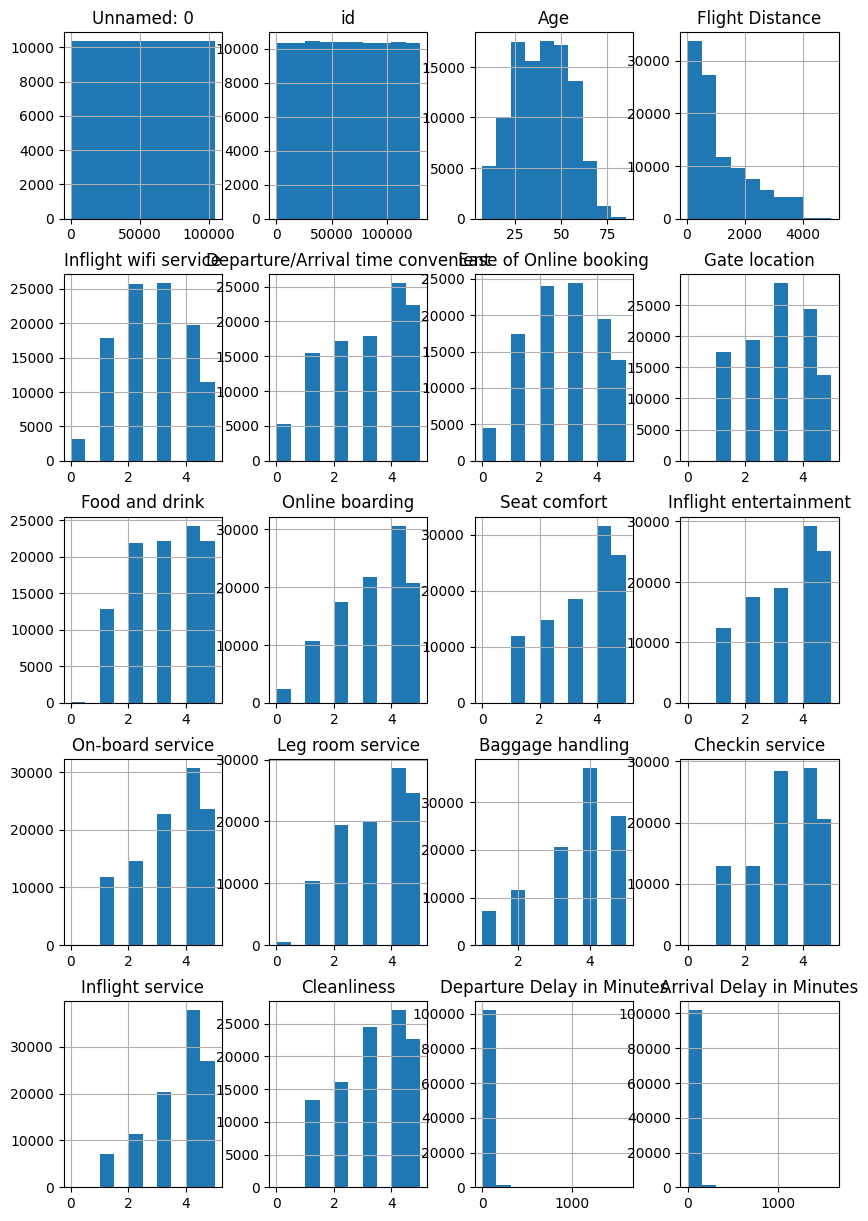

In [12]:
rcParams["figure.figsize"] = 10,15
df.hist()

In [13]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


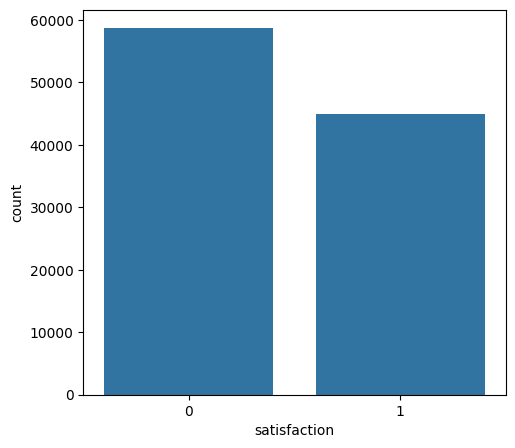

In [70]:
# Data Distribution
import seaborn as sns
import matplotlib.pyplot as plt
#rcParams["figure.figsize"] = 5,5
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x="satisfaction",data=df)
plt.show()

# Data Preprocessing

In [15]:
 # Remove unnecessary columns
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)

## one-hot encoding for nominal

In [16]:
# Use get_dummies
df = pd.get_dummies(df, columns=["Gender", "Customer Type", "Type of Travel", "Class"])

## LabelEncoder for ordianl_col

In [17]:
# Use mapping
df["satisfaction"] = df["satisfaction"].map({"satisfied": 1, "neutral or dissatisfied": 0})

In [18]:
df["satisfaction"].value_counts()

satisfaction
0    58697
1    44897
Name: count, dtype: int64

In [19]:
df.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,satisfaction,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,13,460,3,4,3,1,5,3,5,5,...,0,False,True,True,False,False,True,False,False,True
1,25,235,3,2,3,3,1,3,1,1,...,0,False,True,False,True,True,False,True,False,False
2,26,1142,2,2,2,2,5,5,5,5,...,1,True,False,True,False,True,False,True,False,False
3,25,562,2,5,5,5,2,2,2,2,...,0,True,False,True,False,True,False,True,False,False
4,61,214,3,3,3,3,4,5,5,3,...,1,False,True,True,False,True,False,True,False,False


In [20]:
df["satisfaction"].unique()

array([0, 1])

## Split Data

In [21]:
y = df["satisfaction"]
X = df.drop(["satisfaction"], axis = 1)

In [22]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42, stratify=y_train_val)

## Standardizing the Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # calculate the parameters for scaling

StandardScaler()

## Scaling

In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

## Create layers

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [26]:
#input_dim = X_train_scaled.shape[1]  # Number of features in the input dataset
#model = Sequential([
 #   Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
  #  Dropout(0.5),  # Dropout can be adjusted based on the overfitting observed
   # Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)),
    #Dropout(0.5),  # Adding another dropout layer for regularization
    #Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
#])

## compile the model // Optimizer

In [27]:
#optimizer = Adam(learning_rate=0.001)model.compile(optimizer=optimizer,
 #             loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
  #            metrics=['accuracy'])

In [28]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)
#model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)

In [30]:
#history = model.fit(
 #   X_train_scaled, y_train,
  #  epochs=100,  # Set a high number of epochs and let early stopping end training
   # batch_size=32,
    #validation_data=(X_val_scaled, y_val),
    #callbacks=[early_stopping, model_checkpoint],
    #verbose=1
#)

## Early stopping

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0.001,
    patience=5,
    verbose=1,
    mode='min',
    restore_best_weights=True
)


In [32]:

history = model.fit(
    X_train_scaled,
    y_train,
    epochs=40,
    validation_data=(X_valid_scaled, y_val),
    callbacks=[early_stopping]
)

Epoch 1/40
2072/2072 [==============================] - 7s 3ms/step - loss: 0.2820 - accuracy: 0.8838 - val_loss: 0.1972 - val_accuracy: 0.9191
Epoch 2/40
2072/2072 [==============================] - 5s 2ms/step - loss: 0.1751 - accuracy: 0.9298 - val_loss: 0.1621 - val_accuracy: 0.9317
Epoch 3/40
2072/2072 [==============================] - 6s 3ms/step - loss: 0.1495 - accuracy: 0.9389 - val_loss: 0.1366 - val_accuracy: 0.9443
Epoch 4/40
2072/2072 [==============================] - 5s 2ms/step - loss: 0.1386 - accuracy: 0.9425 - val_loss: 0.1335 - val_accuracy: 0.9449
Epoch 5/40
2072/2072 [==============================] - 5s 2ms/step - loss: 0.1311 - accuracy: 0.9449 - val_loss: 0.1269 - val_accuracy: 0.9473
Epoch 6/40
2072/2072 [==============================] - 5s 3ms/step - loss: 0.1268 - accuracy: 0.9468 - val_loss: 0.1231 - val_accuracy: 0.9446
Epoch 7/40
2072/2072 [==============================] - 5s 3ms/step - loss: 0.1240 - accuracy: 0.9485 - val_loss: 0.1181 - val_accuracy:

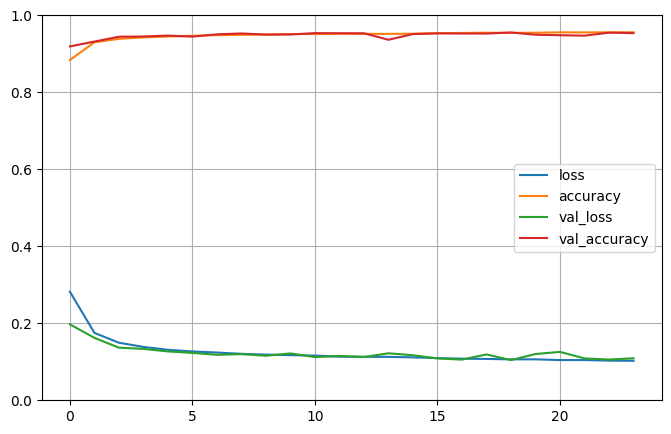

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [34]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Loss: {:.2f}, Test Accuracy: {:.2f}".format(test_loss, test_accuracy))

648/648 [==============================] - 1s 2ms/step - loss: 0.1010 - accuracy: 0.9583
Test Loss: 0.10, Test Accuracy: 0.96


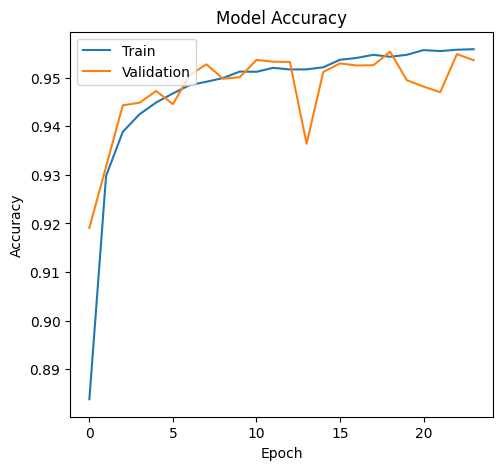

In [35]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

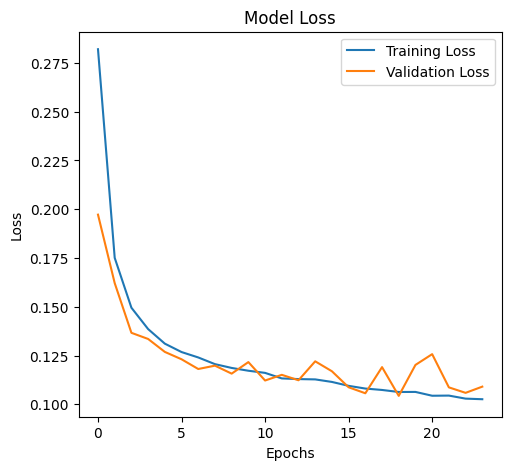

In [69]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## classification report

In [37]:
from sklearn.metrics import classification_report
import time
import numpy as np
start_time = time.time()
test_predictions = np.argmax(model.predict(X_test_scaled), axis=-1)

print(classification_report(y_test,test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

648/648 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.72     11740
           1       0.00      0.00      0.00      8979

    accuracy                           0.57     20719
   macro avg       0.28      0.50      0.36     20719
weighted avg       0.32      0.57      0.41     20719

Time taken to predict the model 1.4176709651947021


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# Predict probabilities for the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to binary labels
y_pred = (y_pred_probs > 0.5).astype(int)

648/648 [==============================] - 1s 1ms/step


In [39]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11468   272]
 [  591  8388]]


# Confusion Matrix

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

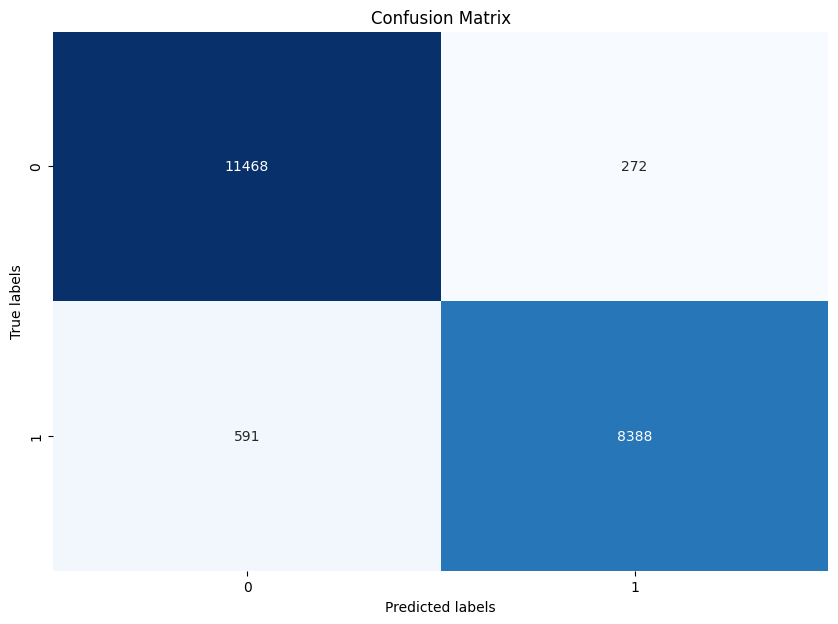

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                896       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1569 (6.13 KB)
Trainable params: 1569 (6.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



# Hyberparametrs



In [50]:
pip install keras-tuner --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.7 MB/s eta 0:00:00


In [55]:
import kerastuner as kt
import tensorflow as tf
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
      model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=optimizer,
    metrics=["accuracy"])
    return model


In [58]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train_scaled,y_train, epochs=10,
                           validation_data=(X_valid_scaled, y_val))

Trial 5 Complete [00h 00m 55s]
val_accuracy: 0.8552036285400391

Best val_accuracy So Far: 0.9526395201683044
Total elapsed time: 00h 05m 42s


In [59]:
best_hp = random_search_tuner.get_best_hyperparameters()[0]

print("Best number of hidden layers: ", best_hp.get('n_hidden'))
print("Best number of neurons per layer: ", best_hp.get('n_neurons'))
print("Best learning rate: ", best_hp.get('learning_rate'))
print("Best optimizer: ", best_hp.get('optimizer'))

Best number of hidden layers:  4
Best number of neurons per layer:  74
Best learning rate:  0.00905127409782462
Best optimizer:  adam
